<a href="https://colab.research.google.com/github/LuluW8071/ASR-with-Speech-Sentiment-and-Text-Summarizer/blob/main/Speech_Sentiment_Analysis/Speech_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install kaggle

from google.colab import files

# Upload kaggle.json from kaggle_account > your_profile > API section > Create new token
files.upload();

Saving kaggle.json to kaggle.json


## Download Dataset and Extract

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset from kaggle
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 423M/429M [00:03<00:00, 158MB/s]
100% 429M/429M [00:03<00:00, 148MB/s]


In [3]:
from tqdm.notebook import tqdm
import zipfile

zip_file_path = 'ravdess-emotional-speech-audio.zip'
extracted_dir = 'dataset/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in tqdm(iterable=zip_ref.namelist(), total=len(zip_ref.namelist()), desc='Extracting'):
        zip_ref.extract(file, extracted_dir)

print(f"Dataset extracted to {extracted_dir}")

Extracting:   0%|          | 0/2880 [00:00<?, ?it/s]

Dataset extracted to dataset/


## Load Datasets

In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
modality = {'01':'full_av','02':'video_only','03':'audio_only'}
vocal_channel = {'01':'speech','02':'song'}
emotion = {'02':'calm','03':'happy','04':'sad','05':'angry','06':'fearful','07':'disgust','08':'surprised'}     # Didnt use neutral
emotional_intensity = {'01':'normal','02':'strong'}
statement = {'01':'Kids are talking by the door','02':'Dogs are sitting by the door'}
reptition = {'01':'first_repitition','02':'second_repetition'}

def actor_f(num):
    return ('female') if int(num)%2==0 else ('male')

In [6]:
actors = sorted(os.listdir('dataset/audio_speech_actors_01-24'))
# actors.pop()
len(actors)

24

In [7]:
audio_file_dict = {}
for actor in actors:
    actor_dir = os.path.join('dataset/audio_speech_actors_01-24',actor)
    actor_files = os.listdir(actor_dir)
    actor_dict = [i.replace(".wav","").split("-") for i in actor_files]
    dict_entry = {os.path.join(actor_dir,i):j for i,j in zip(actor_files,actor_dict)}
    audio_file_dict.update(dict_entry)

In [8]:
audio_file_df = pd.DataFrame.from_dict(audio_file_dict, orient='index', columns=['modality',
                                                                                 'vocal_channel',
                                                                                 'emotion',
                                                                                 'emotional_intensity',
                                                                                 'statement',
                                                                                 'repetition',
                                                                                 'actor'])
# audio_file_dict.columns = ['modality','vocal_channel','emotion','emotional_intensity','statement','repetition','actor']
audio_file_df.reset_index(inplace=True)
audio_file_df.rename(columns={'index': 'path'}, inplace=True)
audio_file_df.head()

,path,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,dataset/audio_speech_actors_01-24/Actor_01/03-...,03,01,06,01,02,01,01
1,dataset/audio_speech_actors_01-24/Actor_01/03-...,03,01,02,01,02,02,01
2,dataset/audio_speech_actors_01-24/Actor_01/03-...,03,01,06,01,01,01,01
3,dataset/audio_speech_actors_01-24/Actor_01/03-...,03,01,03,01,01,02,01
4,dataset/audio_speech_actors_01-24/Actor_01/03-...,03,01,07,02,01,02,01


In [9]:
audio_file_df.shape

(1440, 8)

In [10]:
audio_file_df.modality = audio_file_df.modality.map(modality)
audio_file_df.vocal_channel = audio_file_df.vocal_channel.map(vocal_channel)
audio_file_df.emotion = audio_file_df.emotion.map(emotion)
audio_file_df.emotional_intensity = audio_file_df.emotional_intensity.map(emotional_intensity)
audio_file_df.statement = audio_file_df.statement.map(statement)
audio_file_df.repetition = audio_file_df.repetition.map(reptition)
audio_file_df['actor_sex'] = audio_file_df.actor.apply(actor_f)

In [11]:
audio_file_df.sample(5)

,path,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,actor_sex
878,dataset/audio_speech_actors_01-24/Actor_15/03-...,audio_only,speech,angry,strong,Dogs are sitting by the door,first_repitition,15,male
1156,dataset/audio_speech_actors_01-24/Actor_20/03-...,audio_only,speech,happy,normal,Kids are talking by the door,first_repitition,20,female
1149,dataset/audio_speech_actors_01-24/Actor_20/03-...,audio_only,speech,surprised,normal,Kids are talking by the door,first_repitition,20,female
282,dataset/audio_speech_actors_01-24/Actor_05/03-...,audio_only,speech,calm,normal,Dogs are sitting by the door,second_repetition,05,male
721,dataset/audio_speech_actors_01-24/Actor_13/03-...,audio_only,speech,happy,strong,Dogs are sitting by the door,first_repitition,13,male


## Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

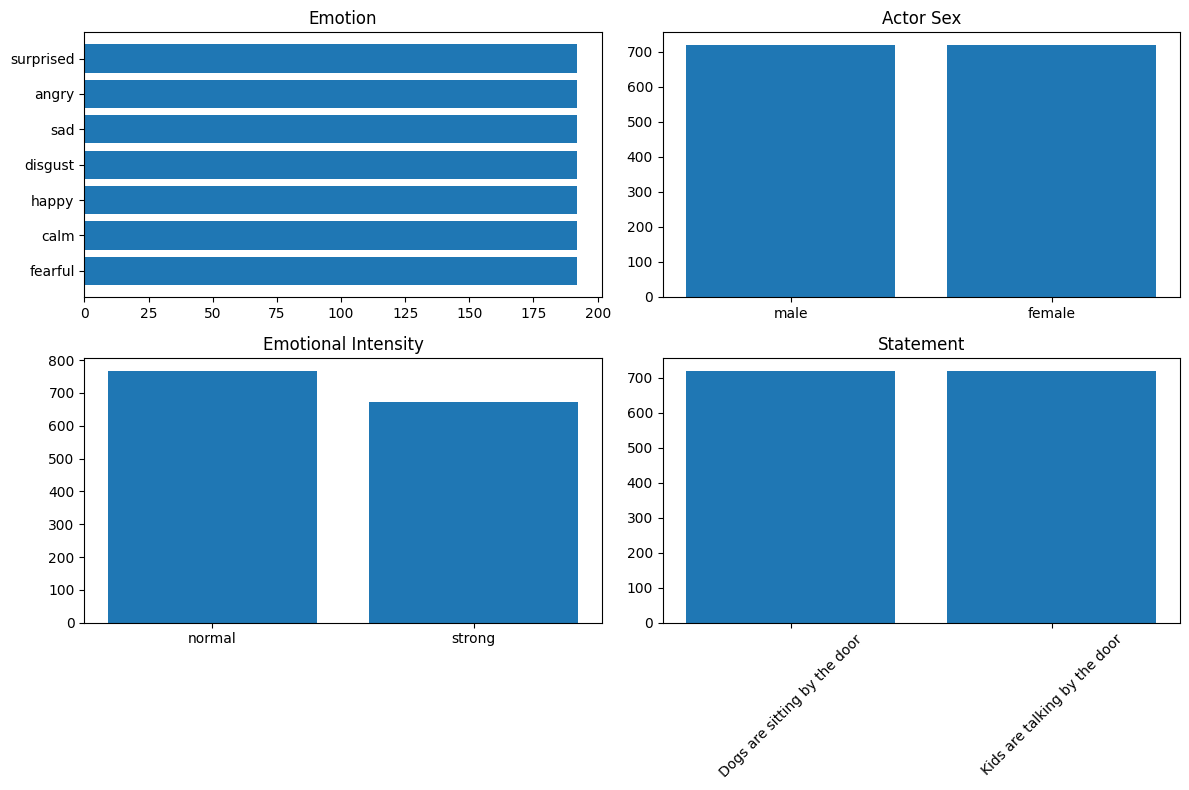

In [13]:
fig, (ax1,ax2) = plt.subplots(2, 2,figsize=(12,8))
ax1[0].barh(y=audio_file_df.emotion.value_counts().index,width=audio_file_df.emotion.value_counts().values)
ax1[0].set_title('Emotion')
ax1[1].bar(x=audio_file_df.actor_sex.value_counts().index,height=audio_file_df.actor_sex.value_counts().values)
ax1[1].set_title('Actor Sex')
ax2[0].bar(x=audio_file_df.emotional_intensity.value_counts().index,height=audio_file_df.emotional_intensity.value_counts().values)
ax2[0].set_title('Emotional Intensity')
ax2[1].bar(x=audio_file_df.statement.value_counts().index,height=audio_file_df.statement.value_counts().values)
plt.xticks(rotation=45)
ax2[1].set_title('Statement')
fig.tight_layout()

## Importing Torch Libraries

In [14]:
import torch
import torchaudio

import librosa
import librosa.display
from IPython.display import Audio
from tqdm.auto import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [15]:
sample1, sample_rate1 = torchaudio.load('dataset/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')
sample2, sample_rate2 = torchaudio.load('dataset/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav')

print(sample1, sample_rate1, sample1.ndim, sample1.shape, sep=' --- ')
print(sample2, sample_rate2, sample2.ndim, sample2.shape, sep=' --- ')

tensor([[0., 0., 0.,  ..., 0., 0., 0.]]) --- 48000 --- 2 --- torch.Size([1, 158558])
tensor([[ 0.0000e+00,  0.0000e+00, -3.0518e-05,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]]) --- 48000 --- 2 --- torch.Size([1, 160160])


In [16]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [18]:
# missing = audio_file_dict.isnull().emotion
# missing

In [19]:
audio_file_df.emotion

0         fearful
1            calm
2         fearful
3           happy
4         disgust
          ...    
1435          NaN
1436      fearful
1437         calm
1438        angry
1439    surprised
Name: emotion, Length: 1440, dtype: object

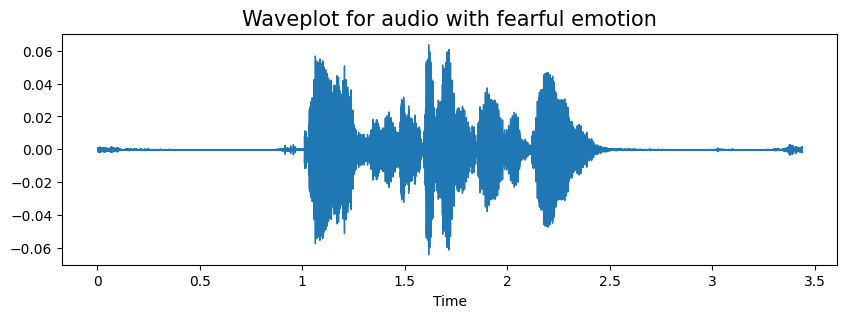

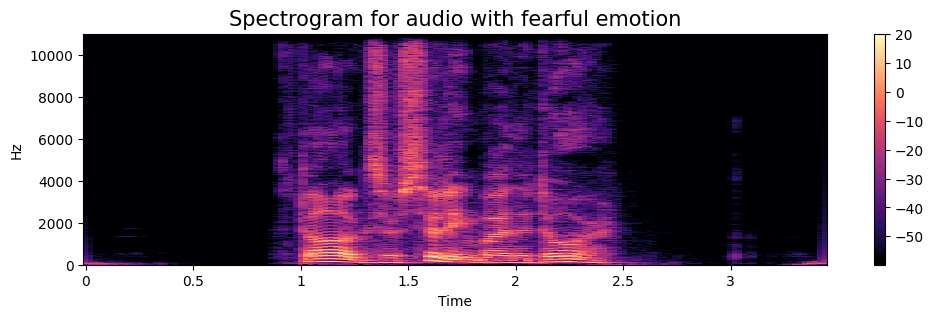

In [20]:
emotion='fearful'
data_path = 'dataset/audio_speech_actors_01-24/'
path = np.array(audio_file_df[audio_file_df.emotion==emotion])[0][0]
# print(path[0])
data, sampling_rate = librosa.load(path)
# print(data, sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

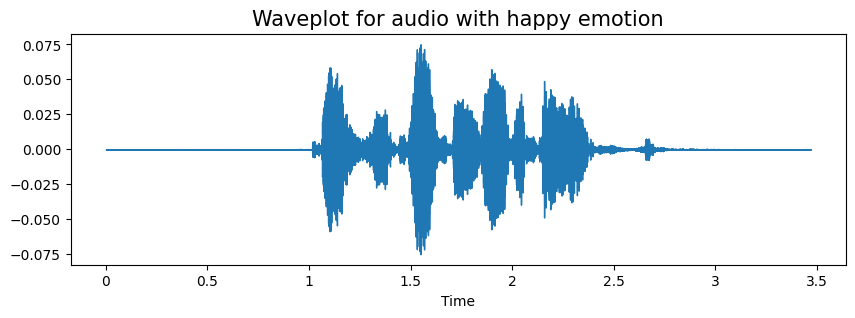

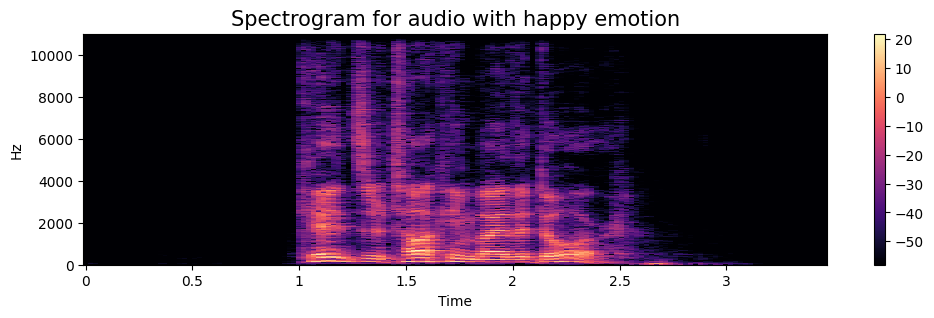

In [21]:
emotion='happy'
data_path = 'dataset/audio_speech_actors_01-24/'
path = np.array(audio_file_df[audio_file_df.emotion==emotion])[0][0]
# print(path[0])
data, sampling_rate = librosa.load(path)
# print(data, sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [22]:
audio_files = []
for i in tqdm(list(audio_file_df.path)):
    i, _ = torchaudio.load(i)
    audio_files.append(i)

  0%|          | 0/1440 [00:00<?, ?it/s]

In [23]:
# getting min and max length of our audio datasets
maxlen = 0
minlen = np.Inf
for i in audio_files:
    if i.shape[1]>maxlen:
        maxlen = i.shape[1]
    if i.shape[1]<minlen:
        minlen = i.shape[1]

minlen, maxlen

(140941, 253053)

# Encoding audio data into Spectrogram and Visualizing

Shape of spectrogram: torch.Size([1, 201, 793])


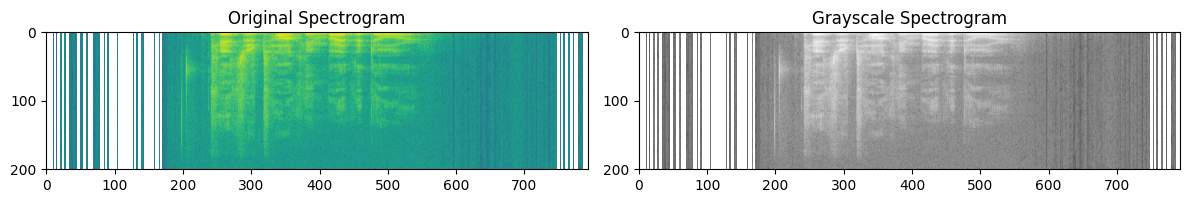

In [24]:
specgram = torchaudio.transforms.Spectrogram()(sample1)

print("Shape of spectrogram: {}".format(specgram.size()))

# Convert the tensor to a numpy array
specgram_np = specgram.log2()[0, :, :].numpy()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(specgram_np, cmap='viridis')
axes[0].set_title('Original Spectrogram')

axes[1].imshow(specgram_np, cmap='gray')
axes[1].set_title('Grayscale Spectrogram')
plt.tight_layout()
plt.show();

## Saving dataframe into CSV

In [25]:
audio_file_df.to_csv('audio_file.csv', index=False)